In [35]:
import networkx as nx
import pandas as pd
import numpy as np
import sys

In [36]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [37]:
def CreateListYear(x,y):
    l1 = []
    for i in range(x,y):
        l1.append(str(i))
    return l1

In [38]:
#Parametrs 
Ratings = 8.5
TitleType = ['movie','tvMovie']
StartYear1 = range(2010,2020)
StartYear2 = CreateListYear(2000, 2020)   
Category = ['actor','actress']
NumberVotes = 1000

In [39]:
#Create set of movies with parameters TitleType and StartYear
DataTitle = pd.read_csv("C:/Users/dinan/Downloads/IMBD/title.basics.tsv", usecols= [0,1,5] , delimiter="\t")
MData = DataTitle[DataTitle.titleType.isin(TitleType)]
YMData1 = MData[MData.startYear.isin(StartYear1)]
YMData2 = MData[MData.startYear.isin(StartYear2)]
YMData = pd.DataFrame(pd.concat([YMData1,YMData2]))

In [40]:
del(DataTitle)
del(MData)
del(YMData1)
del(YMData2)  

if YMData.empty == True:
    print("You need to change the parameters StartYear1 and StartYear2")
    sys.exit()

In [41]:
#Create set of movies with parameter Ratings and merge its with YMData
DataRat = pd.read_csv("C:/Users/dinan/Downloads/IMBD/ratings.tsv", usecols = [0,1,2], skipinitialspace =True, delimiter="\t")
RTdata = DataRat.loc[DataRat['averageRating'] > Ratings]
NVdata = RTdata.loc[RTdata['numVotes'] > NumberVotes]
Rdata = NVdata.merge(YMData, on = 'tconst')

del(DataRat)
del(YMData)

if Rdata.empty == True:
    print("You need to change the parameter Ratings")
    sys.exit()


In [42]:
#Create set of movies and actors with parameter Category and merge its with RData
DataActor = pd.read_csv("C:/Users/dinan/Downloads/IMBD/title.principals.tsv", usecols= [0,2,3],skipinitialspace =True, delimiter="\t")
Adata = DataActor[DataActor.category.isin(Category)]
del(DataActor)
GraphData = Rdata.merge(Adata, on ='tconst')
del(Adata)
del(Rdata)


In [43]:
#Create dataset for graph
mov = GraphData.tconst
act = GraphData.nconst
del(GraphData)
List1 = {'Movies':mov,'Actors':act}
ListData = pd.DataFrame(List1, columns= ['Movies', 'Actors'])
Link_list = ListData.values.tolist()

In [27]:
# Create the bipartite graph
G = nx.Graph()
G.add_nodes_from(list(mov), bipartite=0)
G.add_nodes_from(list(act), bipartite=1)
G.add_edges_from(Link_list)
del(Link_list)

In [28]:
#Create the graph which contains relationships between actors/actresses
ActorG = nx.projected_graph(G,list(act))
del(G)

if nx.is_empty(ActorG) == True:
    print("The graph is empty")
    sys.exit()


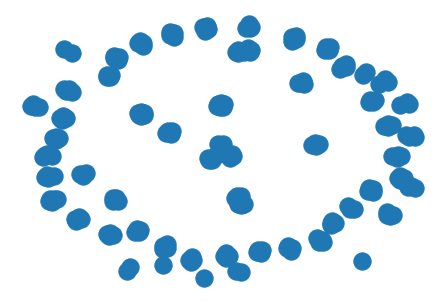

In [29]:
nx.draw(ActorG)

In [30]:
#Check if the graph is connected. 
#If it is not "True" then create connected subgraph. Calculate values.
if nx.is_connected(ActorG) == True:
    avgG = nx.closeness_centrality(ActorG)
    minAG = max (list(avgG.values())) 
    ecG = nx.eccentricity(ActorG)
    minEG = min (list(ecG.values()))
    deG = nx.degree_centrality(ActorG)
    maxdeG = max (list(deG.values()))
    eiG = nx.eigenvector_centrality(ActorG)
    maxeiG = max (list(eiG.values()))
    beG = nx.betweenness_centrality(ActorG)
    maxbeG = max (list(beG.values()))
else:
    d = ActorG.subgraph( max(nx.connected_components(ActorG),key=len)  )
    avgG = nx.closeness_centrality(ActorG)
    minAG = max (list(avgG.values()))
    ecG = nx.eccentricity(d)
    minEG = min (list(ecG.values()))
    deG = nx.degree_centrality(ActorG)
    maxdeG = max (list(deG.values()))
    eiG = nx.eigenvector_centrality(ActorG)
    maxeiG = max (list(eiG.values()))
    beG = nx.betweenness_centrality(ActorG)
    maxbeG = max (list(beG.values()))
del(ActorG)

In [31]:
avgG

{'nm0000190': 0.013953488372093023,
 'nm0004266': 0.013953488372093023,
 'nm1567113': 0.013953488372093023,
 'nm3237775': 0.013953488372093023,
 'nm1011887': 0.009302325581395349,
 'nm5408141': 0.009302325581395349,
 'nm1422099': 0.009302325581395349,
 'nm8339825': 0.004651162790697674,
 'nm8070811': 0.004651162790697674,
 'nm1311666': 0.013953488372093023,
 'nm3043737': 0.013953488372093023,
 'nm2512337': 0.013953488372093023,
 'nm10838885': 0.013953488372093023,
 'nm0000138': 0.013953488372093023,
 'nm0330687': 0.013953488372093023,
 'nm0680983': 0.013953488372093023,
 'nm0913822': 0.013953488372093023,
 'nm3164292': 0.013953488372093023,
 'nm0006763': 0.013953488372093023,
 'nm1796390': 0.013953488372093023,
 'nm3586278': 0.013953488372093023,
 'nm0637748': 0.018604651162790697,
 'nm3606900': 0.018604651162790697,
 'nm3604337': 0.018604651162790697,
 'nm3627944': 0.027906976744186046,
 'nm1049461': 0.018604651162790697,
 'nm4071801': 0.018604651162790697,
 'nm4071710': 0.01860465116

In [32]:
#Find unique identifiers of actors/actresses with found values and write them to a list
AvG_act =  get_key(avgG, minAG)
EcG_act =  get_key(ecG, minEG)
deG_act = get_key(deG, maxdeG)
eiG_act = get_key(eiG, maxeiG)
beG_act = get_key(beG, maxbeG)
NActor = [AvG_act,EcG_act,deG_act,eiG_act,beG_act]

In [33]:
#Find the names of the actors/actresses
DataActor = pd.read_csv("C:/Users/dinan/Downloads/IMBD/name.basics.tsv", usecols= [0,1] , delimiter="\t")
NameActor = DataActor[DataActor.nconst.isin(NActor)]
del(DataActor)  

In [34]:
#Print result
print("Actor has smallest average distance:", NameActor.primaryName[NameActor.nconst.isin([AvG_act])]) 
print("Closeness centrality:", minAG)   
print("Actor has smallest maximum distance:",NameActor.primaryName[NameActor.nconst.isin([EcG_act])])
print("Eccentricity value:", minEG) 


print("Actor has larges degree centrality:",NameActor.primaryName[NameActor.nconst.isin([deG_act])])
print("Degree centrality value:", maxdeG)  
print("Actor has lasrgest Eigenvector centrality:",NameActor.primaryName[NameActor.nconst.isin([eiG_act])])
print("Eigenvector centrality value:", maxeiG)  
print("Actor has largest Betweenness centrality:",NameActor.primaryName[NameActor.nconst.isin([beG_act])])
print("Betweenness centrality value:", maxbeG)  


Actor has smallest average distance: 3947974    Patrick Sweeney
Name: primaryName, dtype: object
Closeness centrality: 0.0
Actor has smallest maximum distance: 506317    Madhavan
Name: primaryName, dtype: object
Eccentricity value: 2
Actor has larges degree centrality: 4745216    Laural Merlington
Name: primaryName, dtype: object
Degree centrality value: 0.027906976744186046
Actor has lasrgest Eigenvector centrality: 244964    Alfred Enoch
Name: primaryName, dtype: object
Eigenvector centrality value: 0.3779644284755118
Actor has largest Betweenness centrality: 5116653    Vijay Sethupathi
Name: primaryName, dtype: object
Betweenness centrality value: 0.0011736579004564226
